<a href="https://colab.research.google.com/github/2303A51057/AIML-2025_B16/blob/main/LAB_EXAM_1057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '/content/bd_students_per.csv'
data = pd.read_csv(file_path)

data['average_score'] = data[['english', 'math', 'science']].mean(axis=1)
data['pass_fail'] = (data['average_score'] >= 60).astype(int)

X = data[['english', 'math', 'science']]
y = data['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723


Confusion Matrix:
[[ 415    0]
 [   0 1308]]


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

data['performance'] = (data['math'] >= 75).astype(int)

features = ['english', 'science', 'social_science', 'attendance']
X = data[features]
y = data['performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm, classification_report(y_test, y_pred)

(array([[1206,  154],
        [ 217, 1007]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      1360\n           1       0.87      0.82      0.84      1224\n\n    accuracy                           0.86      2584\n   macro avg       0.86      0.85      0.86      2584\nweighted avg       0.86      0.86      0.86      2584\n')

In [43]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.86
F1-Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


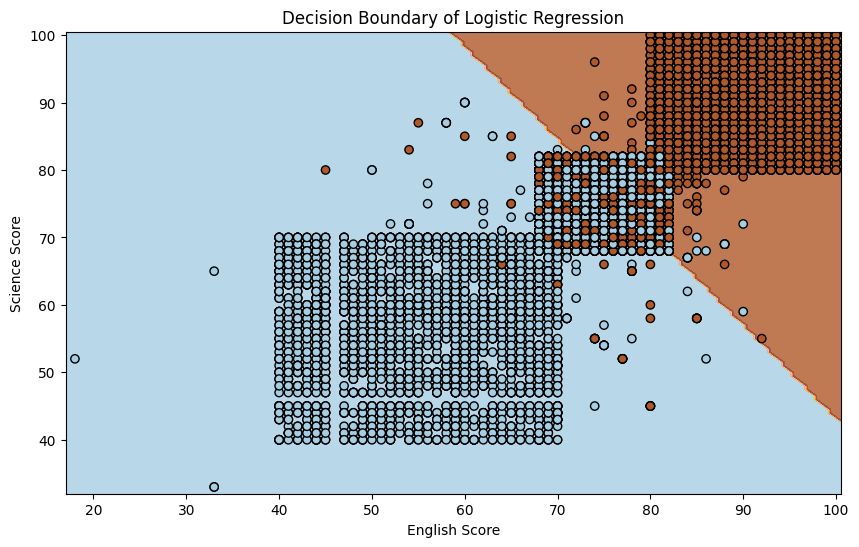

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X_vis = X[['english', 'science']]
y_vis = y

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_vis, y_vis)

x_min, x_max = X_vis['english'].min() - 1, X_vis['english'].max() + 1
y_min, y_max = X_vis['science'].min() - 1, X_vis['science'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_vis['english'], X_vis['science'], c=y_vis, edgecolor='k', cmap=plt.cm.Paired)
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('English Score')
plt.ylabel('Science Score')
plt.show()


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_l2.fit(X_train, y_train)

y_pred_l2 = log_reg_l2.predict(X_test)

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("Logistic Regression with L2 Regularization")
print(f"Accuracy: {accuracy_l2:.2f}")
print(f"F1-Score: {f1_l2:.2f}")

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_train, y_train)

y_pred_l1 = log_reg_l1.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print("\nLogistic Regression with L1 Regularization")
print(f"Accuracy: {accuracy_l1:.2f}")
print(f"F1-Score: {f1_l1:.2f}")


Logistic Regression with L2 Regularization
Accuracy: 0.85
F1-Score: 0.84

Logistic Regression with L1 Regularization
Accuracy: 0.85
F1-Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
